# In this notebook we visualize effects of different parameters in creating flat maps

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import akita_utils.format_io as format_io

# sns.set_theme()

# Importing scores from simulations

In [2]:
h5_dirs = "/home1/kamulege/akita_utils/bin/background_seq_experiments/data/shuffled_seqs_scores/*/*.h5" 
dfs = []
for h5_file in glob.glob(h5_dirs):
    dfs.append(format_io.h5_to_df(h5_file, drop_duplicates_key=None))    
dfs = pd.concat(dfs)
dfs

,CS_h1_m1_t0,CS_h1_m1_t1,CS_h1_m1_t2,CS_h1_m1_t3,CS_h1_m1_t4,CS_h1_m1_t5,GC_content,MPS_h1_m1_t0,MPS_h1_m1_t1,MPS_h1_m1_t2,...,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,ctcf_selection_threshold,locus_specification,mutation_method,out_folder,shuffle_parameter
0,-20.718750,96.500000,-0.317871,27.703125,-12.484375,29.531250,0.367139,0.188110,0.190674,0.282471,...,39.9375,35.81250,46.90625,22.68750,25.843750,4,"chr2,96673792,97984512",permute_whole_seq,data,4
1,19.125000,29.796875,48.687500,34.375000,50.593750,63.812500,0.367139,1.170898,1.458984,1.266602,...,299.0000,409.00000,573.50000,57.59375,42.625000,4,"chr2,96673792,97984512",randomise_whole_seq,data,4
2,9.781250,13.195312,7.136719,-12.734375,12.648438,8.437500,0.367139,0.591797,0.589355,0.245605,...,174.2500,51.34375,31.50000,84.18750,60.906250,4,"chr2,96673792,97984512",mask_motif,data,4
3,11.453125,46.875000,61.343750,51.062500,-2.130859,17.000000,0.367139,0.498291,0.469482,0.290771,...,120.3125,41.46875,53.18750,37.75000,58.000000,4,"chr2,96673792,97984512",permute_motif,data,4
4,14.750000,49.000000,43.156250,36.593750,-7.281250,15.234375,0.367139,0.675293,0.656250,0.464111,...,150.5000,84.37500,121.56250,33.62500,52.218750,4,"chr2,96673792,97984512",randomise_motif,data,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,-11.453125,77.875000,4.503906,26.062500,-1.345703,25.265625,0.367221,0.236572,0.231934,0.295166,...,38.1250,49.46875,61.71875,34.15625,36.718750,12,"chr2,81074176,82384896",permute_whole_seq,data,4
71,15.250000,25.203125,35.000000,27.015625,621.000000,-33.968750,0.367221,1.195312,1.258789,1.074219,...,206.7500,313.00000,457.00000,27.90625,31.078125,12,"chr2,81074176,82384896",randomise_whole_seq,data,4
72,-6.046875,-17.171875,-7.613281,-6.019531,-9.710938,-5.132812,0.367221,0.385986,0.401367,0.557617,...,50.4375,54.25000,52.40625,53.40625,47.843750,12,"chr2,81074176,82384896",mask_motif,data,4
73,-6.046875,-17.171875,-7.613281,-6.019531,-9.710938,-5.132812,0.367221,0.385986,0.401367,0.557617,...,50.4375,54.25000,52.40625,53.40625,47.843750,12,"chr2,81074176,82384896",permute_motif,data,4


In [3]:
dfs["mean_SCD_score"] = (dfs["SCD_h1_m1_t0"]+dfs["SCD_h1_m1_t1"]+dfs["SCD_h1_m1_t2"]+dfs["SCD_h1_m1_t3"]+dfs["SCD_h1_m1_t4"]+dfs["SCD_h1_m1_t5"])/6
dfs["mean_MSS_score"] = (dfs["MSS_h1_m1_t0"]+dfs["MSS_h1_m1_t1"]+dfs["MSS_h1_m1_t2"]+dfs["MSS_h1_m1_t3"]+dfs["MSS_h1_m1_t4"]+dfs["MSS_h1_m1_t5"])/6
dfs["mean_MPS_score"] = (dfs["MPS_h1_m1_t0"]+dfs["MPS_h1_m1_t1"]+dfs["MPS_h1_m1_t2"]+dfs["MPS_h1_m1_t3"]+dfs["MPS_h1_m1_t4"]+dfs["MPS_h1_m1_t5"])/6
# dfs["mean_CS_score"] = (dfs["CS_h1_m1_t0"]+dfs["CS_h1_m1_t1"]+dfs["CS_h1_m1_t2"]+dfs["CS_h1_m1_t3"]+dfs["CS_h1_m1_t4"]+dfs["CS_h1_m1_t5"])/6

# General scores distribution

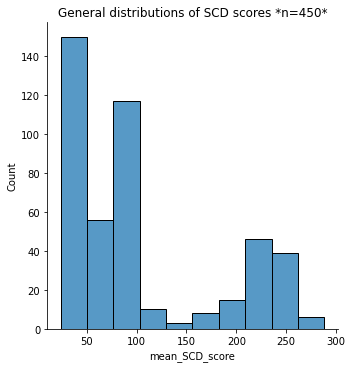

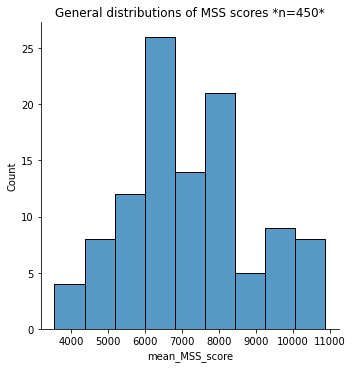

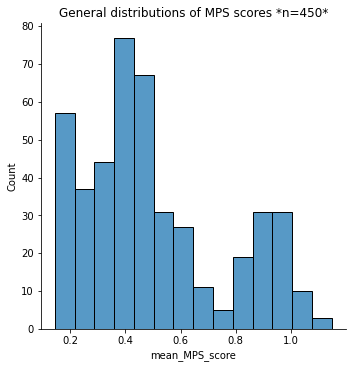

In [4]:
dfs.reset_index(drop=True, inplace=True)
sns.displot(dfs, x="mean_SCD_score")
plt.title(f"General distributions of SCD scores *n={dfs.shape[0]}*")
plt.show()
plt.close()

sns.displot(dfs, x="mean_MSS_score")
plt.title(f"General distributions of MSS scores *n={dfs.shape[0]}*")
plt.show()
plt.close()

sns.displot(dfs, x="mean_MPS_score")
plt.title(f"General distributions of MPS scores *n={dfs.shape[0]}*")
plt.show()
plt.close()

# sns.displot(dfs, x="mean_CS_score")
# plt.title(f"General distributions of CS scores *n={dfs.shape[0]}*")
# plt.show()
# plt.close()

# shuffle parameter effect exploration

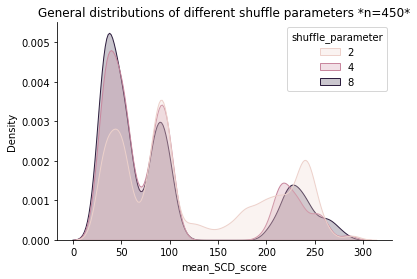

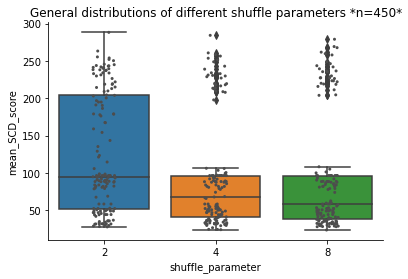

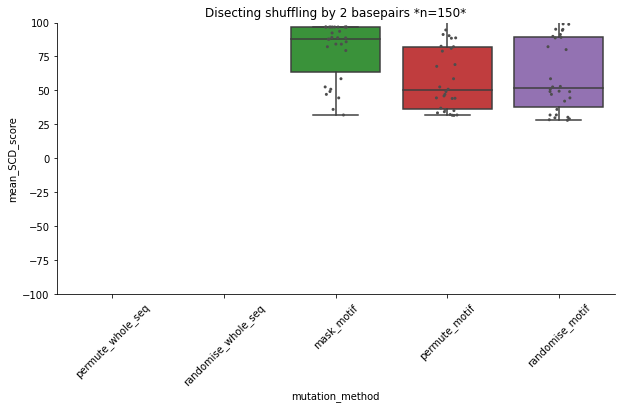

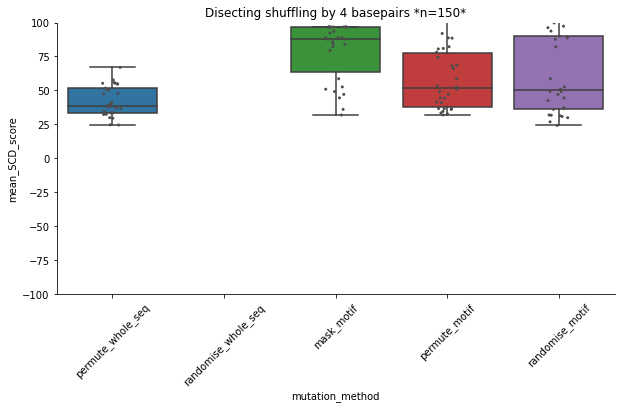

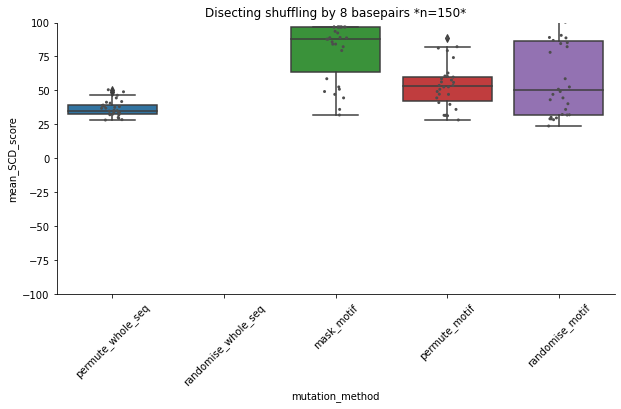

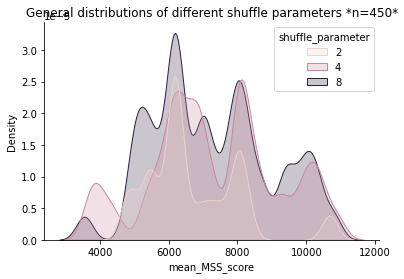

/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


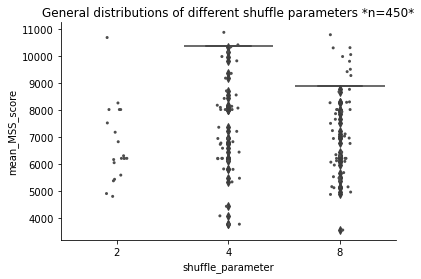

/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


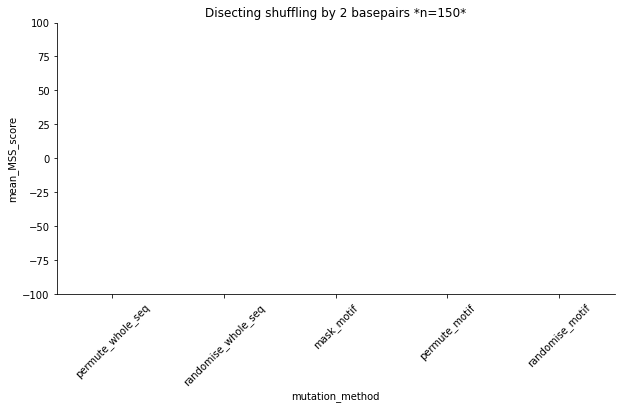

/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


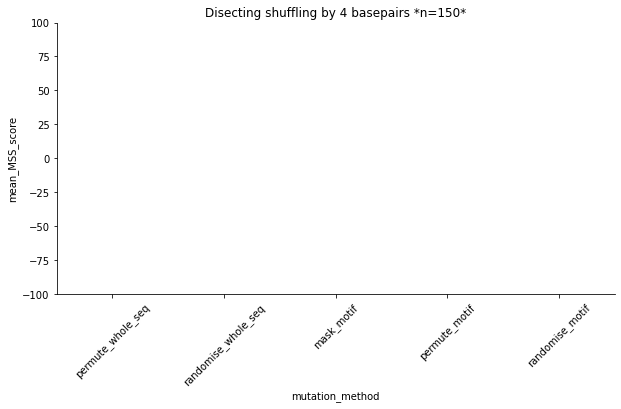

/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home1/kamulege/.conda/envs/basenji-gpu/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


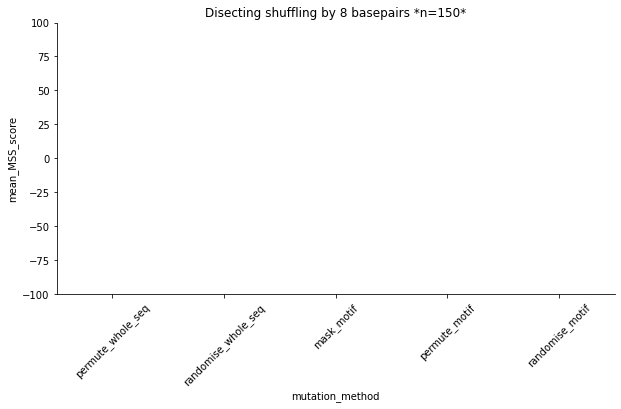

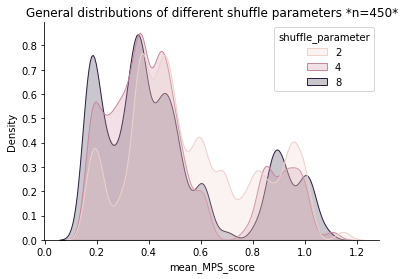

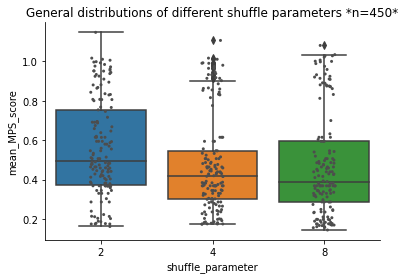

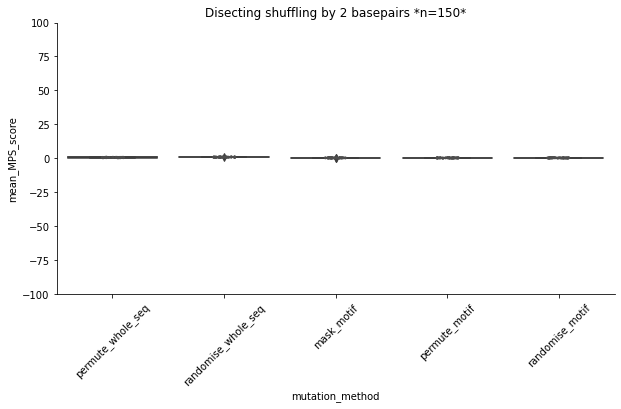

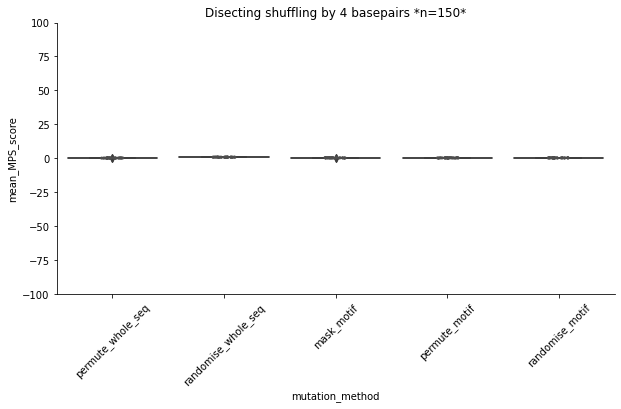

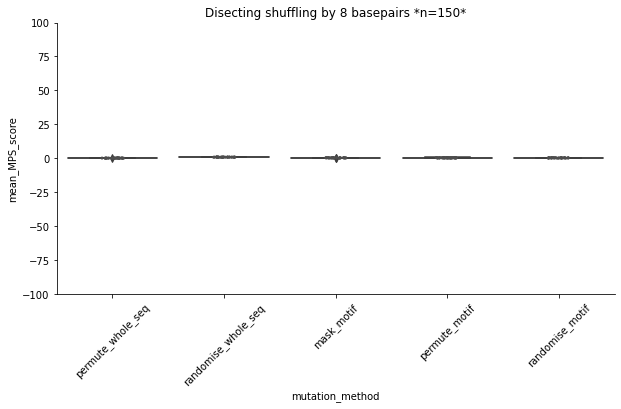

In [5]:
for map_score in ["mean_SCD_score","mean_MSS_score","mean_MPS_score"]: #,"mean_CS_score"
    sns.color_palette("tab10")
    sns.kdeplot(data=dfs, x=map_score, hue="shuffle_parameter", bw_adjust=.3, fill=True)
    plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    sns.boxplot(data=dfs, x='shuffle_parameter', y=map_score)
    sns.stripplot(x="shuffle_parameter", y=map_score, data=dfs, size=3, color=".3", linewidth=0)
    plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    for score in [2,4,8]:
        df_dummy_parameter = dfs.loc[dfs["shuffle_parameter"]==score]
        plt.figure(figsize=(10,5)) # ,dpi=200
        ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y=map_score)
        ax.tick_params(axis='x', labelrotation=45)
        sns.stripplot(x="mutation_method", y=map_score, data=df_dummy_parameter, size=3, color=".3", linewidth=0)
        plt.title(f"Disecting shuffling by {score} basepairs *n={df_dummy_parameter.shape[0]}*")
        sns.despine(top = True, right = True)
        plt.ylim([-100,100])
        plt.show()
        plt.close()

# map threshold effect exploration

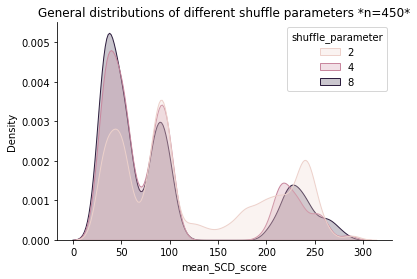

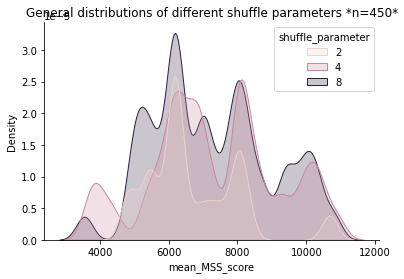

ValueError: Could not interpret value `mean_CS_score` for parameter `x`

In [6]:
for score in ["mean_SCD_score","mean_MSS_score","mean_CS_score"]:
    sns.kdeplot(data=dfs, x= score, hue="shuffle_parameter", bw_adjust=.3, fill=True)
    plt.title(f"General distributions of different shuffle parameters *n={dfs.shape[0]}*")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

    # plt.figure(figsize=(12,5))
    # ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
    # ax.tick_params(axis='x', labelrotation=45)
    # sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    # plt.title(f"Disecting {score} as map score threshold *n={df_dummy_parameter.shape[0]}*")
    # sns.despine(top = True, right = True)
    # plt.show()
    # plt.close()

# ctcf selection threshold effect exploration

In [ ]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="ctcf_selection_threshold", bw_adjust=.3, fill=True)
sns.despine(top = True, right = True)
plt.show()
sns.boxplot(data=dfs, x='ctcf_selection_threshold', y="mean_SCD_score")
sns.stripplot(x="ctcf_selection_threshold", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different ctcf selection thresholds *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

for score in [5,8,12]:
    df_dummy_parameter = dfs.loc[dfs["ctcf_selection_threshold"]==score]
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data=df_dummy_parameter, x='mutation_method', y="mean_SCD_score")
    ax.tick_params(axis='x', labelrotation=45)
    sns.stripplot(x="mutation_method", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} as ctcf selection threshold *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

# mutation method effect exploration

In [ ]:
sns.kdeplot(data=dfs, x="mean_SCD_score", hue="mutation_method", bw_adjust=.3, fill=True)
plt.title(f"General distributions of different mutation methods *n={dfs.shape[0]}* \n")
sns.despine(top = True, right = True)
plt.show()

plt.figure(figsize=(10,5))
ax = sns.boxplot(data=dfs, x='mutation_method', y="mean_SCD_score")
ax.tick_params(axis='x', labelrotation=45)
sns.stripplot(x="mutation_method", y="mean_SCD_score", data=dfs, size=3, color=".3", linewidth=0)
plt.title(f"General distributions of different mutation methods *n={dfs.shape[0]}*")
sns.despine(top = True, right = True)
plt.show()
plt.close()

for score in ['permute_whole_seq','permute_motif']: # ,'mask_motif','randomise_motif','randomise_whole_seq','mask_motif'
    df_dummy_parameter = dfs.loc[dfs["mutation_method"]==score]
    sns.boxplot(data=df_dummy_parameter, x='shuffle_parameter', y="mean_SCD_score")
    sns.stripplot(x="shuffle_parameter", y="mean_SCD_score", data=df_dummy_parameter, size=3, color=".3", linewidth=0)
    plt.title(f"Disecting {score} *n={df_dummy_parameter.shape[0]}* \n")
    sns.despine(top = True, right = True)
    plt.show()
    plt.close()

# GC content effect exploration

In [ ]:
sns.jointplot(data=dfs, y=f"mean_SCD_score", x = "GC_content") #, hue="shuffle_parameter"

In [ ]:
for score in ['permute_whole_seq','randomise_whole_seq','mask_motif','permute_motif','randomise_motif']:
    df_dummy_parameter = dfs.loc[dfs["mutation_method"]==score]
    sns.jointplot(data=df_dummy_parameter, y=f"mean_SCD_score", x = "GC_content", hue="shuffle_parameter", color=".3")
    plt.title(f"GC distribution for {score} *n={df_dummy_parameter.shape[0]}*\n")